In [42]:
from sqlalchemy import create_engine
import mysql.connector as mc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,stats 


import arabic_reshaper
from bidi.algorithm import get_display


In [ ]:
df = pd.read_excel(r"C:\Users\PC\OneDrive\Desktop\AbdelrahmanSeif_AI_G3\نتيجة الثانوية العامة 2025.xlsx")

conn = mc.connect(
    host="localhost",
    user="root",
    password="",
    database="thanawya2025"
)

cursor = conn.cursor()

cursor.execute("""
    CREATE TABLE IF NOT EXISTS students (
        seating_no VARCHAR(20),
        arabic_name TEXT,
        total_degree FLOAT
    );
""")

for _, row in df.iterrows():
    cursor.execute(
        "INSERT INTO students (seating_no, arabic_name, total_degree) VALUES (%s, %s, %s)",
        (str(row['seating_no']), str(row['arabic_name']), float(row['total_degree']) if not pd.isna(row['total_degree']) else None)
    )

conn.commit()
conn.close()

print("done")


In [6]:
engine = create_engine("mysql+mysqlconnector://root:@localhost/thanawya2025")
query = "SELECT * FROM students"
df = pd.read_sql(query, engine)

In [ ]:
df.head(10)

,seating_no,arabic_name,total_degree
0,1001660,محمد ابو الحسن حسن مصطفى,163.5
1,1001661,محمد احمد محمد ابو زيد,187.5
2,1001662,محمد على محمود عبدالعزيز,168.0
3,1001663,محمود سيد انور محمد حامد,212.0
4,1001664,محمود عطيه محمود جابر حجاج,154.0
5,1001665,مروان اشرف بدرى عبدالكريم محمد,187.5
6,1001666,مروان محمد بدرى حامد,182.5
7,1001667,هشام محمد احمد عبد ربه حسن,166.5
8,1001668,يوسف رزق الله اسحق رزق الله,118.0
9,1001669,عمرو مصطفى حسنى السيد راغب,161.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810980 entries, 0 to 810979
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   seating_no    810980 non-null  object 
 1   arabic_name   810980 non-null  object 
 2   total_degree  810980 non-null  float64
dtypes: float64(1), object(2)
memory usage: 18.6+ MB


In [8]:
df.describe()

,total_degree
count,810980.000000
mean,210.962989
std,62.900660
min,0.000000
25%,181.500000
50%,217.000000
75%,255.000000
max,404.000000


In [9]:
df.shape

(810980, 3)

In [13]:
df = df.drop_duplicates()
df.shape

(810980, 4)

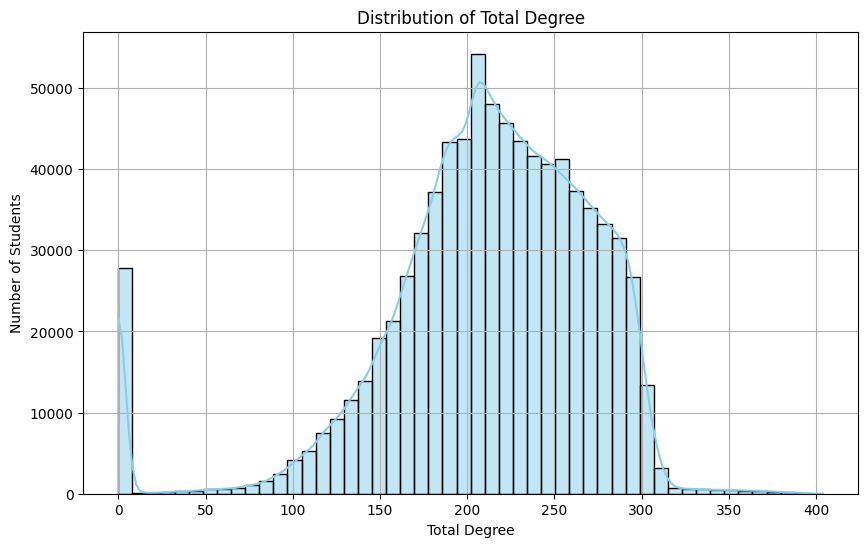

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['total_degree'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Total Degree")
plt.xlabel("Total Degree")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_22392\1501696957.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_degree', y='arabic_name', data=top_10, palette="viridis")
C:\Users\PC\AppData\Local\Temp\ipykernel_22392\1501696957.py:12: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  plt.tight_layout()
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


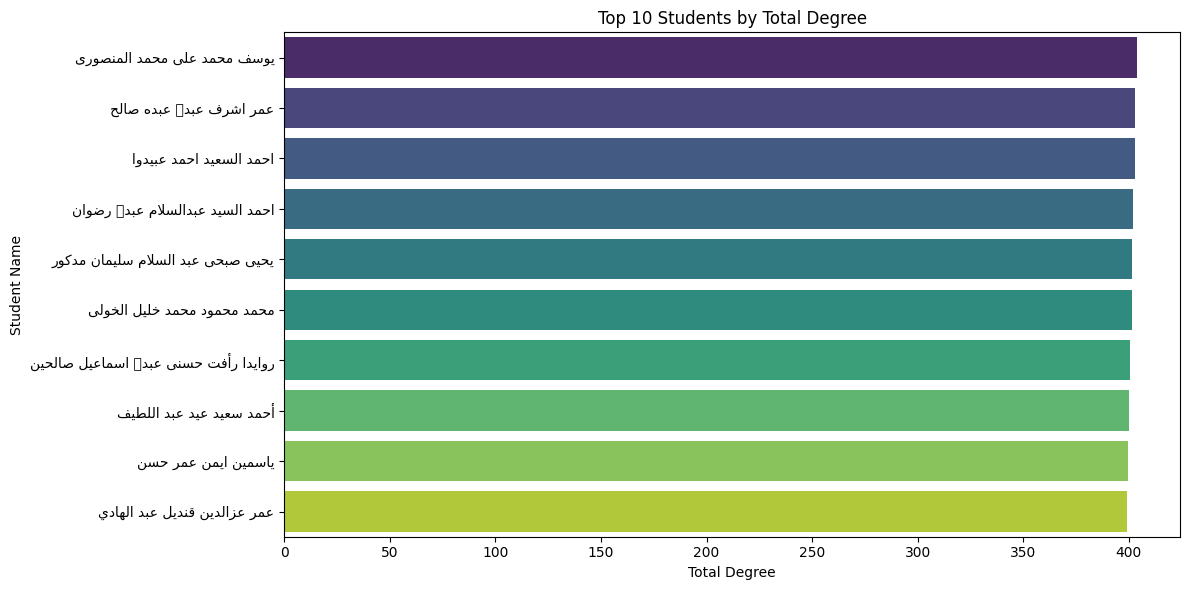

In [11]:
def reshape_arabic_column(column):
    return column.apply(lambda name: get_display(arabic_reshaper.reshape(name)))

top_10 = df.sort_values(by='total_degree', ascending=False).head(10).copy()
top_10['arabic_name'] = reshape_arabic_column(top_10['arabic_name'])

plt.figure(figsize=(12, 6))
sns.barplot(x='total_degree', y='arabic_name', data=top_10, palette="viridis")
plt.title("Top 10 Students by Total Degree")
plt.xlabel("Total Degree")
plt.ylabel("Student Name")
plt.tight_layout()
plt.show()


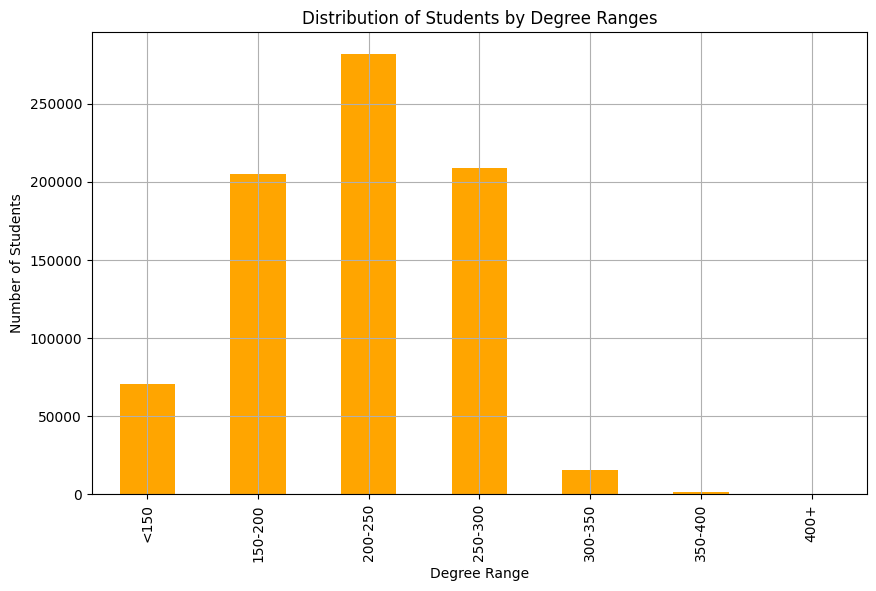

In [12]:
bins = [0, 150, 200, 250, 300, 350, 400, 410]
labels = ['<150', '150-200', '200-250', '250-300', '300-350', '350-400', '400+']
df['range'] = pd.cut(df['total_degree'], bins=bins, labels=labels)

range_counts = df['range'].value_counts().sort_index()
range_counts.plot(kind='bar', figsize=(10,6), color='orange')
plt.title("Distribution of Students by Degree Ranges")
plt.xlabel("Degree Range")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()


In [44]:
skewness_value = skew(df['total_degree'])
print(f"Skewness: {skewness_value:.2f}")

if skewness_value > 0:
    print("Distribution is positively skewed (right-skewed)")
elif skewness_value < 0:
    print("Distribution is negatively skewed (left-skewed)")
else:
    print("Distribution is symmetric")


Skewness: -1.22
Distribution is negatively skewed (left-skewed)


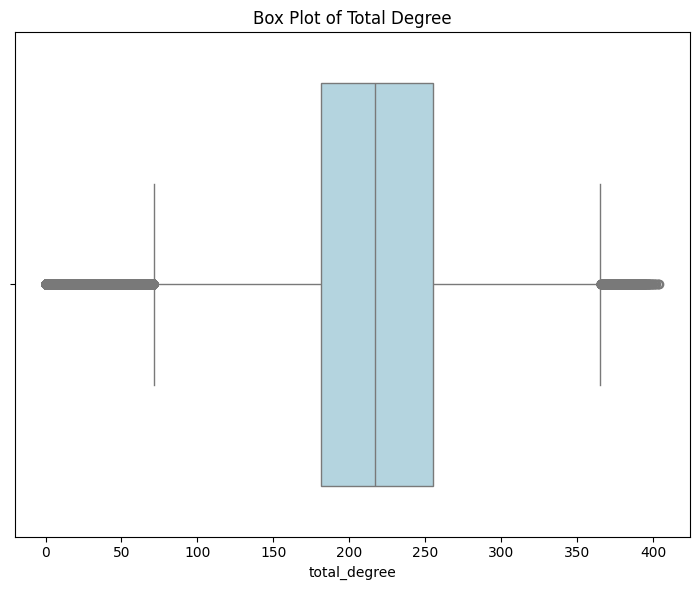

In [48]:
skewness_value = skew(df['total_degree'])
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x=df['total_degree'], color='lightblue')
plt.title("Box Plot of Total Degree")

plt.tight_layout()
plt.show()


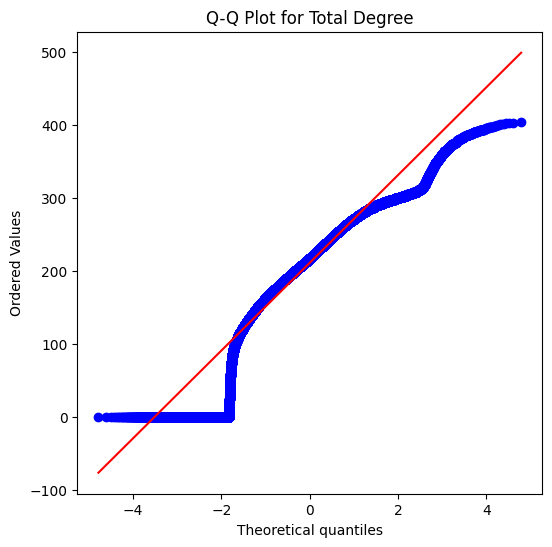

In [36]:
plt.figure(figsize=(6, 6))
stats.probplot(df['total_degree'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Total Degree")
plt.show()

count    810980.000000
mean        210.962989
std          62.900660
min           0.000000
25%         181.500000
50%         217.000000
75%         255.000000
max         404.000000
Name: total_degree, dtype: float64